In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

In [81]:
# display all columns of the dataframe
pd.options.display.max_columns = None

In [82]:
data = pd.read_csv('HDHI Admission data.csv')
data

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,04/01/2017,04/03/2017,81,M,R,E,Apr-17,3,2,DISCHARGE,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1880,1,35,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,234696,04/01/2017,04/05/2017,65,M,R,E,Apr-17,5,2,DISCHARGE,0,1,0,1,1,0,0,13.7,9,149,112,18,0.9,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,234882,04/01/2017,04/03/2017,53,M,U,E,Apr-17,3,3,DISCHARGE,0,0,1,0,1,0,0,10.6,14.7,329,187,93,2.3,210,0,NaN,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,234635,04/01/2017,04/08/2017,67,F,U,E,Apr-17,8,6,DISCHARGE,0,0,0,1,1,0,0,12.8,9.9,286,130,27,0.6,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,234486,04/01/2017,4/23/2017,60,F,U,E,Apr-17,23,9,DISCHARGE,0,0,0,1,0,1,0,13.6,9.1,26,144,55,1.25,1840,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,F,U,O,Mar-19,5,1,DISCHARGE,0,0,1,1,1,0,0,8.8,13.7,361,131,57,1.4,292,1,38,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15753,15754,699500,3/31/2019,04/01/2019,50,M,R,E,Mar-19,2,2,EXPIRY,0,0,1,1,0,1,0,13.2,15.6,142,248,94,1.8,206,0,28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15754,15755,700415,31/03/2019,09/04/2019,82,M,U,E,Mar-19,10,5,DISCHARGE,0,0,0,1,1,0,0,9.3,11.7,372,210,67,1.9,1120,0,32,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15755,15756,699524,31/03/2019,03/04/2019,59,F,U,O,Mar-19,4,2,DISCHARGE,0,0,0,1,1,0,0,13.1,12.5,431,153,29,0.8,78,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              15757 non-null  int64 
 1   MRD No.                          15757 non-null  object
 2   D.O.A                            15757 non-null  object
 3   D.O.D                            15757 non-null  object
 4   AGE                              15757 non-null  int64 
 5   GENDER                           15757 non-null  object
 6   RURAL                            15757 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object
 8   month year                       15757 non-null  object
 9   DURATION OF STAY                 15757 non-null  int64 
 10  duration of intensive unit stay  15757 non-null  int64 
 11  OUTCOME                          15757 non-null  object
 12  SMOKING                         

In [84]:
data.shape

(15757, 56)

### Removing duplicated patient records

In [85]:
# Duplicated patient records
data[data.duplicated(['MRD No.'])].head()

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
16,17,413903,01/04/2017,03/04/2017,54,M,U,O,Apr-17,3,1,DISCHARGE,1,0,0,0,0,0,0,14.7,3.5,280,92,180,2.4,23,0,60,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
90,91,382159,04/04/2017,04/09/2017,47,F,U,E,Apr-17,6,1,DISCHARGE,0,0,1,0,0,0,0,10,10,158,EMPTY,20,0.7,EMPTY,0,60,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95,96,48098,04/05/2017,04/10/2017,65,F,R,O,Apr-17,6,4,DISCHARGE,0,0,0,1,1,0,0,12.4,7.1,196,102,19,0.6,NaN,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
130,131,384232,08/04/2017,12/04/2017,80,F,U,E,Apr-17,5,5,DISCHARGE,0,0,1,1,1,0,0,10.5,9.2,380,156,39,0.9,787,0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
147,148,203622,10/04/2017,17/04/2017,58,F,U,O,Apr-17,8,0,DISCHARGE,0,1,1,1,1,0,0,8.5,8.8,345,217,57,1,1048,0,42,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [86]:
# data.isnull().sum()

In [87]:
data = data.drop_duplicates(['MRD No.'], keep ='last')
data.head()

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,04/01/2017,04/03/2017,81,M,R,E,Apr-17,3,2,DISCHARGE,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1880,1,35,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,234696,04/01/2017,04/05/2017,65,M,R,E,Apr-17,5,2,DISCHARGE,0,1,0,1,1,0,0,13.7,9,149,112,18,0.9,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4,234635,04/01/2017,04/08/2017,67,F,U,E,Apr-17,8,6,DISCHARGE,0,0,0,1,1,0,0,12.8,9.9,286,130,27,0.6,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,234486,04/01/2017,4/23/2017,60,F,U,E,Apr-17,23,9,DISCHARGE,0,0,0,1,0,1,0,13.6,9.1,26,144,55,1.25,1840,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,208455,04/01/2017,4/13/2017,47,M,U,E,Apr-17,13,9,DISCHARGE,0,1,1,1,0,0,0,12.6,9.5,328,159,30,1,NaN,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
data.shape

(12244, 56)

### Dropping columns that are not needed for our analysis

In [89]:
# Columns to Exclude:
# The following columns are less relevant or not useful for modeling:

# SNO, MRD No.: These are identifiers and do not contribute to prediction.
# D.O.A, D.O.D, month year: Dates that are not directly informative for predicting admission.
# OUTCOME: Post-admission outcome, not available before admission.
# DURATION OF STAY, duration of intensive unit stay: These are known only after admission.

In [90]:
columns_to_drop = [
    'SNO', 
    'MRD No.', 
    'D.O.A', 
    'D.O.D', 
    'month year', 
    'OUTCOME',
    'DURATION OF STAY', 
    'duration of intensive unit stay'
]

data = data.drop(columns=columns_to_drop, axis=1)

print("Remaining Columns:")
print(data.columns)

Remaining Columns:
Index(['AGE', 'GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'SMOKING ',
       'ALCOHOL', 'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC',
       'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP',
       'RAISED CARDIAC ENZYMES', 'EF', 'SEVERE ANAEMIA', 'ANAEMIA',
       'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE',
       'HFREF', 'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI', 'CVA INFRACT',
       'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI',
       'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS',
       'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM',
       'CHEST INFECTION'],
      dtype='object')


In [91]:
data.reset_index(drop=True, inplace=True)

In [92]:
# dropping 'HFREF','HFNEF' - as they predict HEART FAILURE directly with 100% accuracy
# HFREF - Heart Failure with Reduced Ejection Fraction
# HRNEF - Heart Failure with Normal Ejection Fraction


data = data.drop(['HFREF','HFNEF'], axis = 1)

In [93]:
data.shape

(12244, 46)

In [94]:
data.dtypes

AGE                                 int64
GENDER                             object
RURAL                              object
TYPE OF ADMISSION-EMERGENCY/OPD    object
SMOKING                             int64
ALCOHOL                             int64
DM                                  int64
HTN                                 int64
CAD                                 int64
PRIOR CMP                           int64
CKD                                 int64
HB                                 object
TLC                                object
PLATELETS                          object
GLUCOSE                            object
UREA                               object
CREATININE                         object
BNP                                object
RAISED CARDIAC ENZYMES              int64
EF                                 object
SEVERE ANAEMIA                      int64
ANAEMIA                             int64
STABLE ANGINA                       int64
ACS                               

### Checking for unique values

In [95]:
data.columns

Index(['AGE', 'GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'SMOKING ',
       'ALCOHOL', 'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC',
       'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP',
       'RAISED CARDIAC ENZYMES', 'EF', 'SEVERE ANAEMIA', 'ANAEMIA',
       'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE',
       'VALVULAR', 'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT',
       'PSVT', 'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION'],
      dtype='object')

In [96]:
data.rename(columns={'SMOKING ': 'SMOKING'}, inplace=True)

In [97]:
cols = ['GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'ALCOHOL',
       'DM', 'HTN', 'SMOKING', 'CAD', 'PRIOR CMP', 'CKD', 'RAISED CARDIAC ENZYMES',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION']
for i in cols:
    print("Unique values for ",i," : ", data[i].unique())

Unique values for  GENDER  :  ['M' 'F']
Unique values for  RURAL  :  ['R' 'U']
Unique values for  TYPE OF ADMISSION-EMERGENCY/OPD  :  ['E' 'O']
Unique values for  ALCOHOL  :  [0 1]
Unique values for  DM  :  [1 0]
Unique values for  HTN  :  [0 1]
Unique values for  SMOKING  :  [0 1]
Unique values for  CAD  :  [0 1]
Unique values for  PRIOR CMP  :  [0 1]
Unique values for  CKD  :  [0 1]
Unique values for  RAISED CARDIAC ENZYMES  :  [1 0]
Unique values for  SEVERE ANAEMIA  :  [0 1]
Unique values for  ANAEMIA  :  [1 0]
Unique values for  STABLE ANGINA  :  [0 1]
Unique values for  ACS  :  [1 0]
Unique values for  STEMI  :  [0 1]
Unique values for  ATYPICAL CHEST PAIN  :  [0 1]
Unique values for  HEART FAILURE  :  [1 0]
Unique values for  VALVULAR  :  [0 1]
Unique values for  CHB  :  [0 1]
Unique values for  SSS  :  [0 1]
Unique values for  AKI  :  [0 1]
Unique values for  CVA INFRACT  :  [0 1]
Unique values for  CVA BLEED  :  [0 1]
Unique values for  AF  :  [0 1]
Unique values for  VT  :  [

In [98]:
data.replace({"\\\\":""},regex=True,inplace=True)

### Checking missing values

In [99]:
data.isna().sum()

AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
HB                                  236
TLC                                 266
PLATELETS                           267
GLUCOSE                             758
UREA                                226
CREATININE                          233
BNP                                6764
RAISED CARDIAC ENZYMES                0
EF                                 1210
SEVERE ANAEMIA                        0
ANAEMIA                               0
STABLE ANGINA                         0
ACS                                   0
STEMI                                 0


In [100]:
numeric_columns = ['HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'EF']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

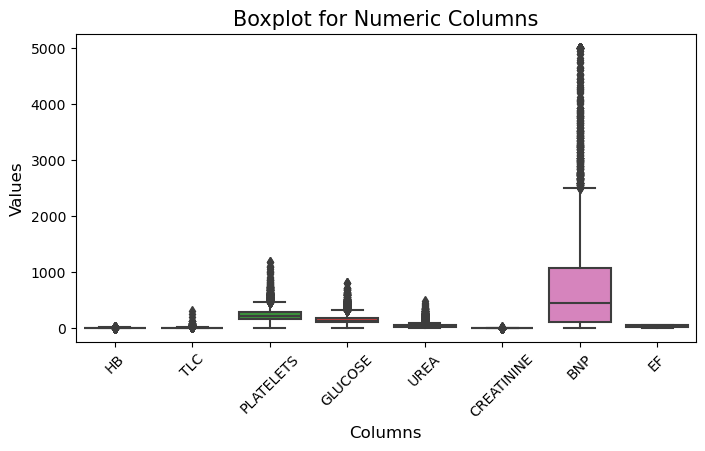

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(data=data[numeric_columns])

plt.title('Boxplot for Numeric Columns', fontsize=15)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)

plt.show()


In [102]:
# BNP has more than 50% missing values, hence dropping it
# BNP: B-TYPE NATRIURETIC PEPTIDE

data = data.drop(['BNP'], axis = 1)

In [103]:
data.shape

(12244, 45)

### Distributions of numerical variables - 'AGE','PLATELETS','GLUCOSE','UREA'

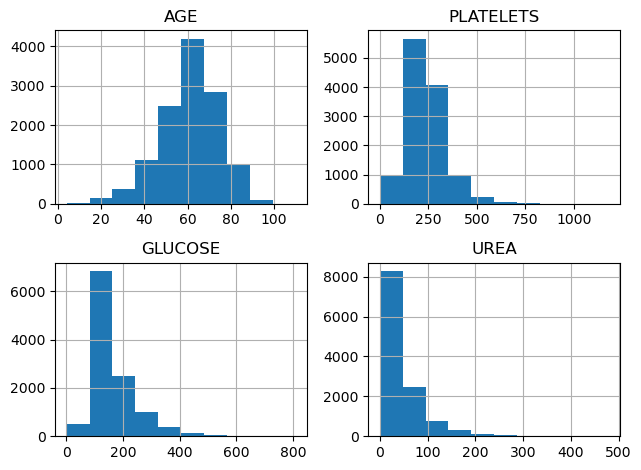

In [104]:
data[['AGE','PLATELETS','GLUCOSE','UREA']].hist()
# adjust the subplots
plt.tight_layout()
plt.show()  

In [105]:
### Distributions of numeric variables - 'HB','TLC','CREATININE','EF'

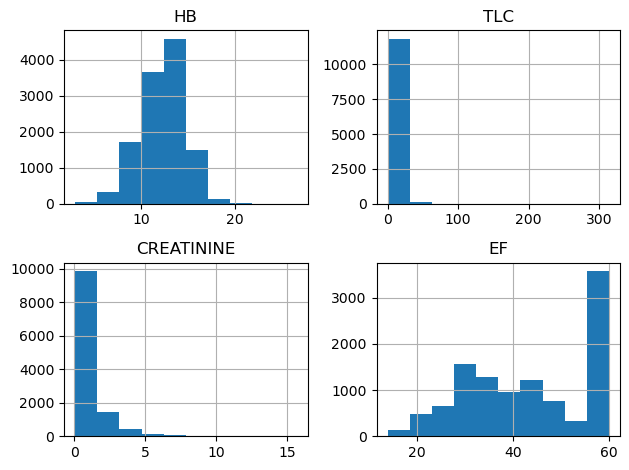

In [106]:
data[['HB','TLC','CREATININE','EF']].hist()
# adjust the subplots
plt.tight_layout()
plt.show()  

In [107]:
data[['AGE','HB','TLC','PLATELETS','GLUCOSE','UREA',
         'CREATININE','EF']].describe()

,AGE,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,EF
count,12244.000000,12004.000000,11974.000000,11970.000000,11426.000000,12015.000000,12008.000000,10969.000000
mean,60.902401,12.282104,11.583630,238.124316,161.153877,48.928898,1.324496,43.912152
std,13.519769,2.329316,7.646784,104.655225,83.086298,41.783565,1.194377,13.453850
min,4.000000,3.000000,0.100000,0.580000,1.200000,0.100000,0.065000,14.000000
25%,53.000000,10.800000,7.900000,171.000000,105.000000,25.000000,0.740000,32.000000
50%,62.000000,12.500000,10.100000,225.000000,134.000000,34.000000,0.960000,44.000000
75%,70.000000,13.900000,13.500000,288.000000,192.000000,56.000000,1.400000,60.000000
max,110.000000,26.500000,314.000000,1179.000000,809.000000,479.000000,15.630000,60.000000


In [108]:
# range of numeric values in the dataset
# EF : 14 - 60 %
# Creatinine : 0.065 - 15.63 mg/dL
# Urea : 0.10 - 479 mg/dL
# Glucose : 1.2 - 809 mg/dL
# Platelets : 0.58 - 1179 K per microL
# TLC : 0.1 - 261 K per microL
# HB : 3 - 26.5 g/dL

### Missing value imputation of numeric variables - KNNImputer Algorithm with K=10

In [109]:
data_num = data.select_dtypes(include = 'number')

In [110]:
imputer = KNNImputer(n_neighbors = 10)
imputed = imputer.fit_transform(data_num)
data_num = pd.DataFrame(imputed, columns = data_num.columns)

In [111]:
data_num.isna().sum()

AGE                          0
SMOKING                      0
ALCOHOL                      0
DM                           0
HTN                          0
CAD                          0
PRIOR CMP                    0
CKD                          0
HB                           0
TLC                          0
PLATELETS                    0
GLUCOSE                      0
UREA                         0
CREATININE                   0
RAISED CARDIAC ENZYMES       0
EF                           0
SEVERE ANAEMIA               0
ANAEMIA                      0
STABLE ANGINA                0
ACS                          0
STEMI                        0
ATYPICAL CHEST PAIN          0
HEART FAILURE                0
VALVULAR                     0
CHB                          0
SSS                          0
AKI                          0
CVA INFRACT                  0
CVA BLEED                    0
AF                           0
VT                           0
PSVT                         0
CONGENIT

In [112]:
data_num.head()

,AGE,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM
0,81.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.5,16.1,337.0,80.0,34.0,0.90,1.0,35.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,65.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,13.7,9.0,149.0,112.0,18.0,0.90,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,12.8,9.9,286.0,130.0,27.0,0.60,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13.6,9.1,26.0,144.0,55.0,1.25,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,12.6,9.5,328.0,159.0,30.0,1.00,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
data_cat = data.select_dtypes(include = 'object')

In [114]:
data_cat

,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,CHEST INFECTION
0,M,R,E,0
1,M,R,E,0
2,F,U,E,0
3,F,U,E,0
4,M,U,E,0
...,...,...,...,...
12239,F,U,E,0
12240,F,U,O,0
12241,M,R,E,0
12242,M,U,E,0


In [115]:
data.head()

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,81,M,R,E,0,0,1,0,0,0,0,9.5,16.1,337.0,80.0,34.0,0.90,1,35.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,65,M,R,E,0,1,0,1,1,0,0,13.7,9.0,149.0,112.0,18.0,0.90,0,42.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,67,F,U,E,0,0,0,1,1,0,0,12.8,9.9,286.0,130.0,27.0,0.60,0,42.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60,F,U,E,0,0,0,1,0,1,0,13.6,9.1,26.0,144.0,55.0,1.25,0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,47,M,U,E,0,1,1,1,0,0,0,12.6,9.5,328.0,159.0,30.0,1.00,0,45.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Distributions of numeric variables - 'HB','TLC','CREATININE','EF' - After Imputation

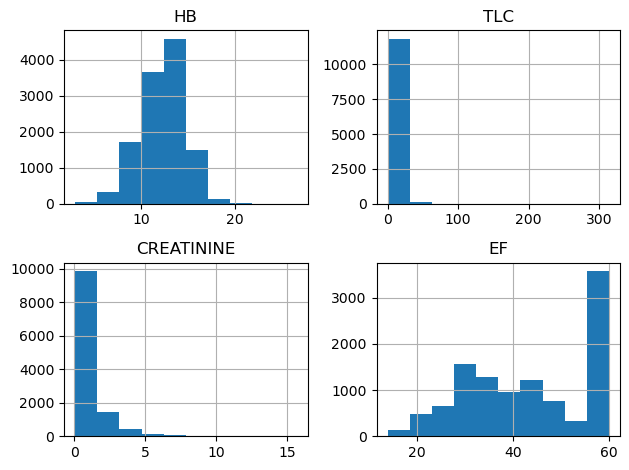

In [116]:
data[['HB','TLC','CREATININE','EF']].hist()
# adjust the subplots
plt.tight_layout()
plt.show()  

### Distributions of numeric variables - 'PLATELETS','GLUCOSE','UREA' - After Imputation

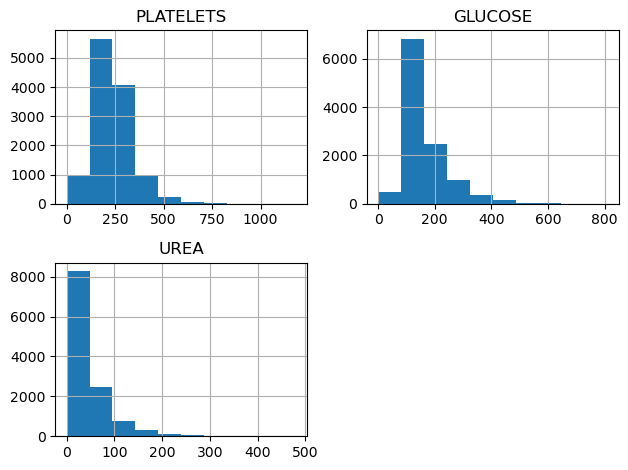

In [117]:
data[['PLATELETS','GLUCOSE','UREA']].hist()
# adjust the subplots
plt.tight_layout()
plt.show()

In [118]:
data[['HB','TLC','PLATELETS','GLUCOSE','UREA','CREATININE','EF']].describe()

,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,EF
count,12004.000000,11974.000000,11970.000000,11426.000000,12015.000000,12008.000000,10969.000000
mean,12.282104,11.583630,238.124316,161.153877,48.928898,1.324496,43.912152
std,2.329316,7.646784,104.655225,83.086298,41.783565,1.194377,13.453850
min,3.000000,0.100000,0.580000,1.200000,0.100000,0.065000,14.000000
25%,10.800000,7.900000,171.000000,105.000000,25.000000,0.740000,32.000000
50%,12.500000,10.100000,225.000000,134.000000,34.000000,0.960000,44.000000
75%,13.900000,13.500000,288.000000,192.000000,56.000000,1.400000,60.000000
max,26.500000,314.000000,1179.000000,809.000000,479.000000,15.630000,60.000000


### Outlier Analysis

In [119]:
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

##### Checking outliers in AGE (years)

Text(0.5, 1.0, 'AGE (years)')

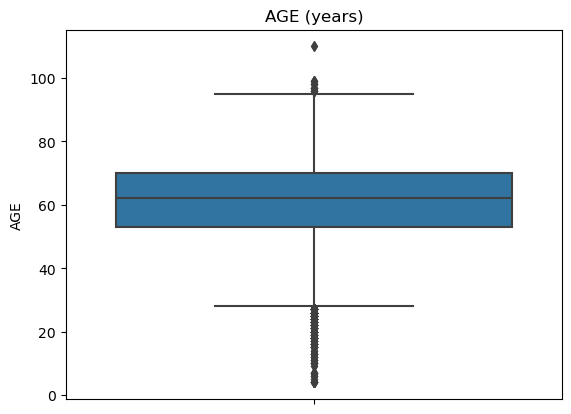

In [120]:
sns.boxplot(data = data, y = 'AGE').set_title("AGE (years)")

In [121]:
print(f"Number of outliers in AGE : {count_outliers(data, 'AGE')}")

Number of outliers in AGE : 238


In [122]:
# any AGE less greater than 100 is considered as an anomaly
data[ (data['AGE'] > 100) ].shape[0]

1

In [123]:
# Removing anomalies
data = data[ (data['AGE'] < 100) ]

##### Checking outliers in HB:  Haemoglobin (g/dL or grams per deciliter)

Text(0.5, 1.0, 'Haemoglobin (g/dL)')

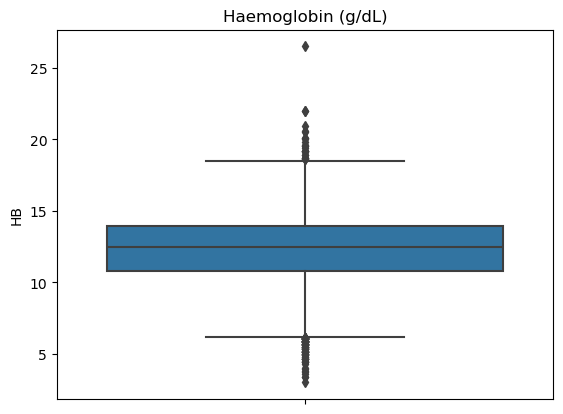

In [124]:
sns.boxplot(data = data, y = 'HB').set_title("Haemoglobin (g/dL)")

In [125]:
print(f"Number of outliers in HB : {count_outliers(data, 'HB')}")

Number of outliers in HB : 120


##### Checking outliers in TLC: TOTAL LEUKOCYTES COUNT (K per microliter)

Text(0.5, 1.0, 'TOTAL LEUKOCYTES COUNT (K per microliter)')

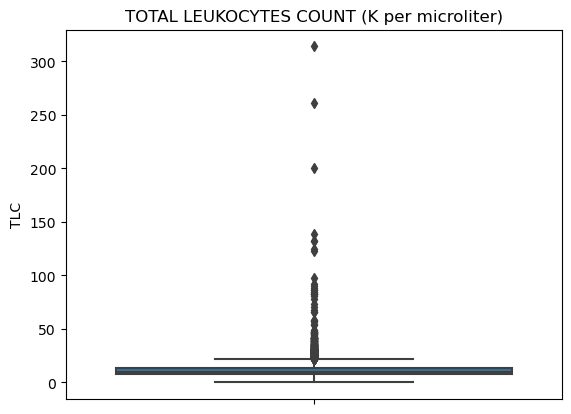

In [126]:
sns.boxplot(data = data, y = 'TLC').set_title("TOTAL LEUKOCYTES COUNT (K per microliter)")

In [127]:
print(f"Number of outliers in TLC : {count_outliers(data, 'TLC')}")

Number of outliers in TLC : 587


In [128]:
# Range of TLC in the dataset is 0.1 -261 K per microL; any value less than 1 K per microL is considered as an anomaly
data[ (data['TLC'] < 1) ].shape[0]

8

In [129]:
# Removing anomalies
data = data[ (data['TLC'] > 1) ]

##### Checking outliers in CREATININE (mg/dL or milligrams per deciliter)

Text(0.5, 1.0, 'CREATININE (mg/dL)')

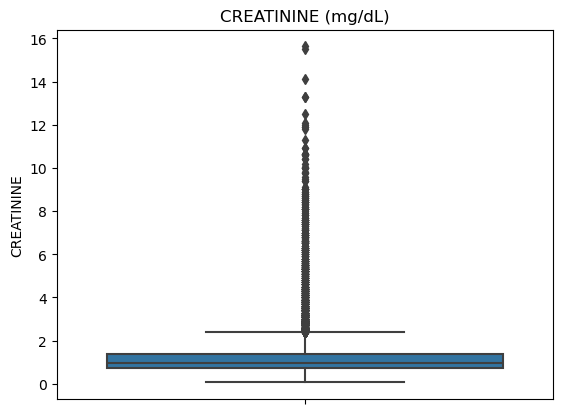

In [130]:
sns.boxplot(data = data, y = 'CREATININE').set_title("CREATININE (mg/dL)")

In [131]:
print(f"Number of outliers in CREATININE : {count_outliers(data, 'CREATININE')}")

Number of outliers in CREATININE : 1188


##### Checking outliers in EF: Ejection Fraction (%)

Text(0.5, 1.0, 'Ejection Fraction (%)')

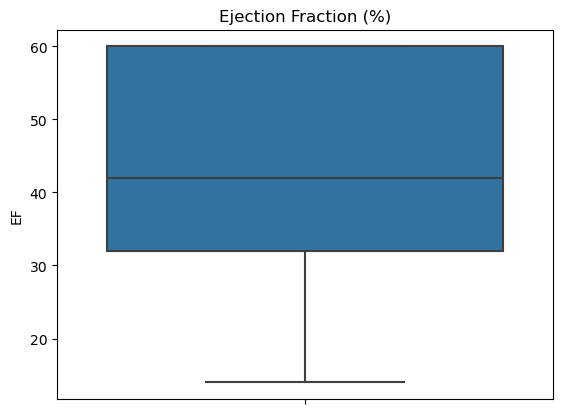

In [132]:
sns.boxplot(data = data, y = 'EF').set_title("Ejection Fraction (%)")

In [133]:
print(f"Number of outliers in EF : {count_outliers(data, 'EF')}")

Number of outliers in EF : 0


##### Checking outliers in GLUCOSE (mg/dL or milligrams per deciliter)

Text(0.5, 1.0, 'GLUCOSE (mg/dL)')

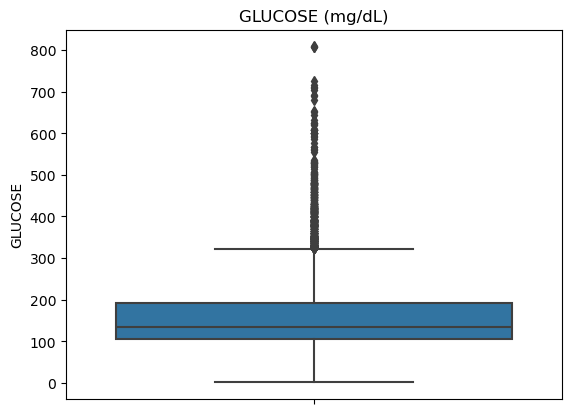

In [134]:
sns.boxplot(data = data, y = 'GLUCOSE').set_title("GLUCOSE (mg/dL)")

In [135]:
print(f"Number of outliers in GLUCOSE : {count_outliers(data, 'GLUCOSE')}")

Number of outliers in GLUCOSE : 600


##### Checking outliers in UREA (mg/dL or milligrams per deciliter)

Text(0.5, 1.0, 'UREA (mg/dL)')

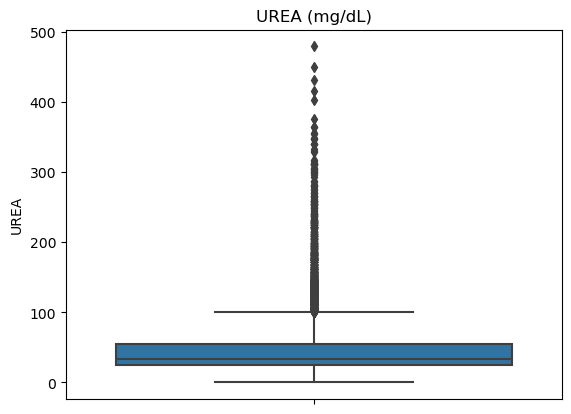

In [136]:
sns.boxplot(data = data, y = 'UREA').set_title("UREA (mg/dL)")

In [137]:
print(f"Number of outliers in UREA : {count_outliers(data, 'UREA')}")

Number of outliers in UREA : 1125


##### Checking outliers in PLATELETS (K per microliter)

Text(0.5, 1.0, 'PLATELETS (K per microliter)')

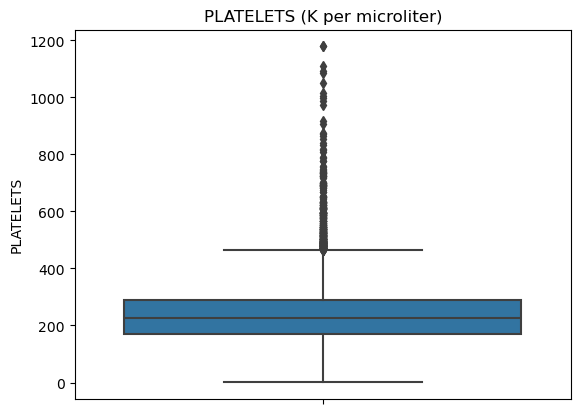

In [138]:
sns.boxplot(data = data, y = 'PLATELETS').set_title("PLATELETS (K per microliter)")

In [139]:
print(f"Number of outliers in PLATELETS : {count_outliers(data, 'PLATELETS')}")

Number of outliers in PLATELETS : 361


In [140]:
# Range of PLATELETS in the dataset is 0.58 -1179 K per microL; any value less than 10 K per microL is considered as an anomaly
data[ (data['PLATELETS'] < 10) ].shape[0]

12

In [141]:
# Removing anomalies
data = data[ (data['PLATELETS'] > 10) ]

In [142]:
data.reset_index(drop=True, inplace=True)

### Scaling of numerical features

In [143]:
data_num = data[['AGE','HB','TLC','CREATININE','EF','GLUCOSE','UREA']]

In [144]:
X_scaler = RobustScaler()

# scale all the numerical columns
num_scaled = X_scaler.fit_transform(data_num)

# create a dataframe of scaled numerical variables
data_scaled = pd.DataFrame(num_scaled, columns = data_num.columns)

In [145]:
data[['AGE','HB','TLC','CREATININE','EF','GLUCOSE','UREA']] = data_scaled

In [146]:
data.head()

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1.117647,M,R,E,0,0,1,0,0,0,0,-0.967742,1.071429,337.0,-0.620690,0.000000,-0.075758,1,-0.250000,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.176471,M,R,E,0,1,0,1,1,0,0,0.387097,-0.196429,149.0,-0.252874,-0.533333,-0.075758,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.294118,F,U,E,0,0,0,1,1,0,0,0.096774,-0.035714,286.0,-0.045977,-0.233333,-0.530303,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.117647,F,U,E,0,0,0,1,0,1,0,0.354839,-0.178571,26.0,0.114943,0.700000,0.454545,0,-0.928571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.882353,M,U,E,0,1,1,1,0,0,0,0.032258,-0.107143,328.0,0.287356,-0.133333,0.075758,0,0.107143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###  Correlation Analysis

In [147]:
data_num = data.select_dtypes(include = 'number')

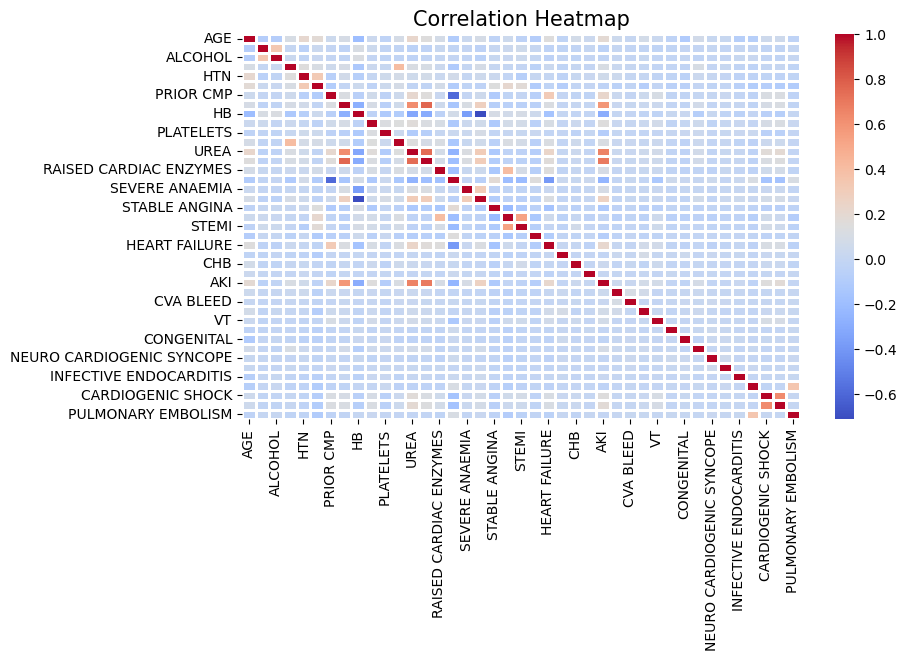

In [148]:
correlation_matrix = data_num.corr()
plt.figure(figsize=(9, 5))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

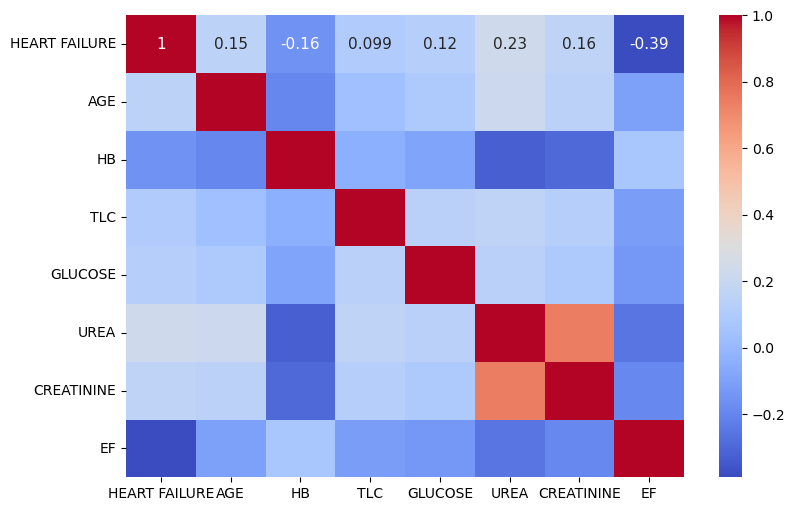

In [149]:
# correlation between heart failure and age and lab parameters
plt.figure(figsize = (9,6))

sns.heatmap(data_num.loc[:,['HEART FAILURE','AGE','HB','TLC','GLUCOSE','UREA','CREATININE','EF'
                               ]].corr(), annot = True,  cmap='coolwarm',annot_kws = {"size": 11})

plt.show()

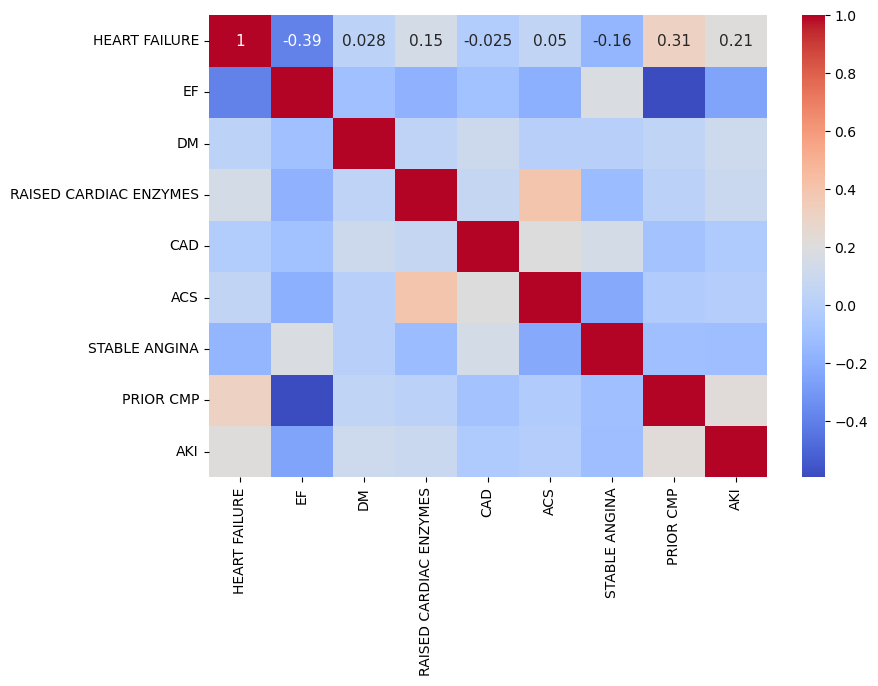

In [150]:
# correlation between heart failure and other comorbodities
plt.figure(figsize = (9,6))

sns.heatmap(data_num.loc[:,['HEART FAILURE','EF','DM','RAISED CARDIAC ENZYMES','CAD','ACS','STABLE ANGINA','PRIOR CMP',
                               'AKI']].corr(), annot = True,  cmap='coolwarm',annot_kws = {"size": 11})

plt.show()

### Building Machine Learning Models to predict HEART FAILURE at the time of admission to hospital

In [151]:
# Converting 'HEART FAILURE' to numeric
data['HEART FAILURE'] = data['HEART FAILURE'].astype('int64')

In [152]:
data['HEART FAILURE'].value_counts()

HEART FAILURE
0    8684
1    3241
Name: count, dtype: int64

In [153]:
le = LabelEncoder()
data['HEART FAILURE'] = le.fit_transform(data['HEART FAILURE'])

X = data.drop(columns=['HEART FAILURE'])
y = data['HEART FAILURE']

In [154]:
X = pd.get_dummies(X)

y = le.fit_transform(y)

print(X.dtypes)  # All should be numeric now
print(y[:5])     # Target should be numeric (0 or 1)

AGE                                  float64
SMOKING                                int64
ALCOHOL                                int64
DM                                     int64
HTN                                    int64
CAD                                    int64
PRIOR CMP                              int64
CKD                                    int64
HB                                   float64
TLC                                  float64
PLATELETS                            float64
GLUCOSE                              float64
UREA                                 float64
CREATININE                           float64
RAISED CARDIAC ENZYMES                 int64
EF                                   float64
SEVERE ANAEMIA                         int64
ANAEMIA                                int64
STABLE ANGINA                          int64
ACS                                    int64
STEMI                                  int64
ATYPICAL CHEST PAIN                    int64
VALVULAR  

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('\nX_test', X_test.shape)
print('y_test', y_test.shape)

X_train (9540, 49)
y_train (9540,)

X_test (2385, 49)
y_test (2385,)


In [161]:
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


#### Random Forest

In [164]:
print("Missing values in X_train:", np.isnan(X_train).sum())
print("Missing values in X_test:", np.isnan(X_test).sum())

Missing values in X_train: 0
Missing values in X_test: 0


In [165]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.779874213836478
Confusion Matrix:
 [[1572  170]
 [ 355  288]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1742
           1       0.63      0.45      0.52       643

    accuracy                           0.78      2385
   macro avg       0.72      0.68      0.69      2385
weighted avg       0.77      0.78      0.77      2385



#### Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7811320754716982
Confusion Matrix:
 [[1577  165]
 [ 357  286]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1742
           1       0.63      0.44      0.52       643

    accuracy                           0.78      2385
   macro avg       0.72      0.68      0.69      2385
weighted avg       0.77      0.78      0.77      2385



#### Naive bayes

In [182]:
from sklearn.naive_bayes import GaussianNB

# Initialize and fit Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions using Naive Bayes
y_pred_nb = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7811320754716982
Confusion Matrix:
 [[1577  165]
 [ 357  286]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1742
           1       0.63      0.44      0.52       643

    accuracy                           0.78      2385
   macro avg       0.72      0.68      0.69      2385
weighted avg       0.77      0.78      0.77      2385



In [167]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [168]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, max_iter=1000)

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)


In [183]:
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes model
nb = GaussianNB()

# Fit the model
nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test)

In [184]:
models = {
    'Random Forest': rf,
    'Logistic Regression': logreg,
    'Naive Bayes': nb
}

# Evaluate each model
metrics = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    metrics[name] = {'accuracy': acc, 'confusion_matrix': cm}
    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{report}")


Random Forest Evaluation:
Accuracy: 0.7799
Confusion Matrix:
[[1572  170]
 [ 355  288]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1742
           1       0.63      0.45      0.52       643

    accuracy                           0.78      2385
   macro avg       0.72      0.68      0.69      2385
weighted avg       0.77      0.78      0.77      2385


Logistic Regression Evaluation:
Accuracy: 0.7811
Confusion Matrix:
[[1577  165]
 [ 357  286]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1742
           1       0.63      0.44      0.52       643

    accuracy                           0.78      2385
   macro avg       0.72      0.68      0.69      2385
weighted avg       0.77      0.78      0.77      2385


Naive Bayes Evaluation:
Accuracy: 0.5434
Confusion Matrix:
[[ 728 1014]
 [  75  568]]
Classification Report:
      

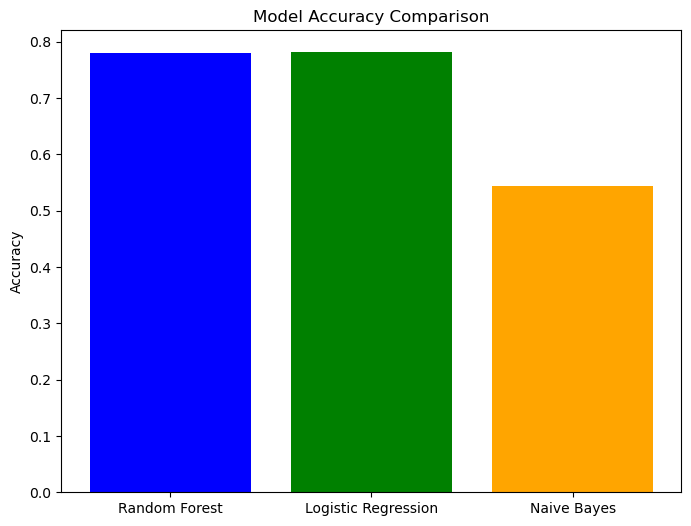

In [185]:
# 1. Bar Graph for Accuracy
plt.figure(figsize=(8, 6))
accuracies = [metrics[model]['accuracy'] for model in metrics]
plt.bar(metrics.keys(), accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

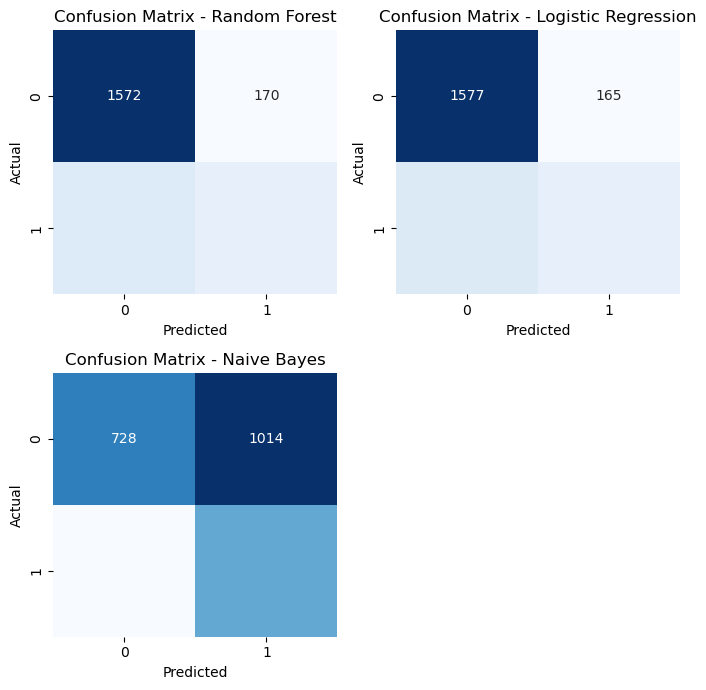

In [195]:
# Heatmaps for Confusion Matrices of all models
plt.figure(figsize=(7, 7))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)  # Create a grid for subplots (2 rows, 2 columns)
    sns.heatmap(metrics[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()  
plt.show()

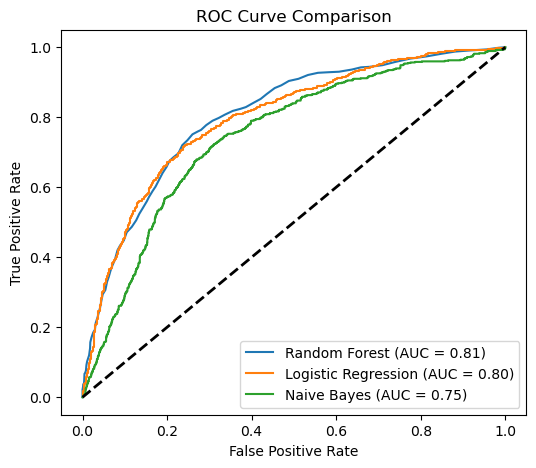

In [199]:
plt.figure(figsize=(6, 5))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()